# CFAR Feature
##### by Milan Zinzuvadiya
### Index
#### 1. Data Exploration and Analysis
##### ---a. selecting fields for data exploration
##### ---b. Calculating CFAR price for break even business
##### ---c. CFAR price based on round or one way trip
##### ---d. Explore fare_price based tendancy of purchase
#### 2. ML Model for predicting CFAR User i.e. classifying attached field
##### ---a. Preparing Data
###### ------i. Encoding String based data
##### ---b. Model Selection and Evaluating Classification
###### ------  F1_score, Accuracy_score, Precision and recall score
#### 3. ML Model for predicting exercise probabilty i.e. classifying exercised field
##### ---a. Preparing Data i.e. selecting attached data for this model
##### ---b. Model Selection and Evaluating Classification
###### ------  F1_score, Accuracy_score, Precision and recall score

### importing data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cfar_data = pd.read_csv('cfar_data.csv')

In [3]:
cfar_data.head(5)

,booking_date_utc,departure_date_utc,return_date_utc,airport_origin,airport_destination,country_origin,country_destination,airline,fare_price,shelf_level,advance,num_pax,trip_type,premium_pct,premium_per_pax,attached,exercised
0,2022-06-03 10:54:18.793 UTC,2022-06-29 07:45:00 UTC,2022-07-01 02:45:00 UTC,DPS,LBJ,ID,ID,QZ,$123.22,1,26,1,r,28.00%,$35.00,1,0
1,2022-08-31 13:32:55.511 UTC,2022-10-09 14:25:00 UTC,NaN,ORY,CTA,FR,IT,TO,$44.66,0,39,1,o,30.00%,$13.01,0,0
2,2022-08-31 11:22:04.11 UTC,2022-08-31 18:25:00 UTC,NaN,MEX,CUN,MX,MX,VB,$67.19,1,0,2,o,20.00%,$13.45,0,0
3,2022-06-19 21:51:45.279 UTC,2022-09-12 10:30:00 UTC,NaN,YHZ,YYZ,CA,CA,WO,$136.57,0,85,2,r,17.00%,$22.25,0,0
4,2022-09-09 02:49:57.983 UTC,2022-10-01 00:45:00 UTC,2022-10-03 15:15:00 UTC,JFK,MIA,US,US,B6,$173.20,0,22,1,r,16.00%,$28.00,1,1


# DATA exploration and analysis

#### Selecting Few Fields to perform analysis for CFAR feature pricing
Selecting a few fileds to perform analyss. NOTE:This is sample analyis. This can be replicated with adding more fields. example includes time-based analysis such as seasonal trend on purchasing CFAR feature,advance and CFAR feature purchase association, Airline to CFAR feature attached as well as exercised association

In [4]:
selected_CFAR= cfar_data[['country_origin','country_destination','fare_price','shelf_level','trip_type','attached','exercised']]
selected_CFAR.head(5)

,country_origin,country_destination,fare_price,shelf_level,trip_type,attached,exercised
0,ID,ID,$123.22,1,r,1,0
1,FR,IT,$44.66,0,o,0,0
2,MX,MX,$67.19,1,o,0,0
3,CA,CA,$136.57,0,r,0,0
4,US,US,$173.20,0,r,1,1


In [5]:
# remove $sign and making it float
selected_CFAR['fare_price'] = selected_CFAR['fare_price'].apply(lambda x: float(x[1:].replace(',','')))
selected_CFAR

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country_origin,country_destination,fare_price,shelf_level,trip_type,attached,exercised
0,ID,ID,123.22,1,r,1,0
1,FR,IT,44.66,0,o,0,0
2,MX,MX,67.19,1,o,0,0
3,CA,CA,136.57,0,r,0,0
4,US,US,173.20,0,r,1,1
...,...,...,...,...,...,...,...
87494,GT,CR,249.22,1,r,0,0
87495,US,MX,352.95,1,o,0,0
87496,MX,US,304.79,0,o,0,0
87497,MX,CO,149.71,0,o,0,0


## Estimate CFAR price value by seeing USER tendancy to attched feature

In [6]:
len(selected_CFAR[selected_CFAR['attached']==1])

4483

In [7]:
len(selected_CFAR[(selected_CFAR['attached']==1) & (selected_CFAR['exercised']==1)])

613

In [8]:
len(selected_CFAR[(selected_CFAR['attached']==1) & (selected_CFAR['exercised']==1) ])/len(selected_CFAR[selected_CFAR['attached']==1])

0.13673879098817757

In [9]:
len(selected_CFAR)

87499

In [10]:
len(selected_CFAR[selected_CFAR['attached']==1])/len(selected_CFAR)

0.05123487125567149

#### 5.12% Users preferred CFAR feature
#### 13.67% Users claimed CFAR feature for cancellation

### Calculate CFAR price in which we have break even for given data set
Here I took following assumption that everytime user cancel Company needs to refund fare_price to the user.

In [11]:
def revenue_from_CFAR(CFAR_price_per):
    return sum(selected_CFAR[selected_CFAR['attached']==1]['fare_price']*(CFAR_price_per/100.0))

In [12]:
def cancellation_refund(refund_per):
    return sum(selected_CFAR[(selected_CFAR['attached']==1) & (selected_CFAR['exercised']==1)]['fare_price']*(refund_per/100.0))

In [13]:
revenue_from_CFAR(12.925)

148771.74163499934

In [14]:
cancellation_refund(100.0)

148757.35000000033

In [15]:
profit = revenue_from_CFAR(12.92375) - cancellation_refund(100.0)
profit

0.00365225036512129

As we can see that by setting CFAR feature price at 12.92375% of fare_price , we can generate revenue which cancel out pay-offs.

While in case of cancellation, We need to pay 148757$ revenue. 

Which translate as having profit of 0.00$.

#### It is safe to set 15% fare price as CFAR feature Price according to sample data.

### CFAR price based on round or one way trip

In [16]:
print('Total r trip CFAR Users')
r_TCUsers = len(selected_CFAR[(selected_CFAR['attached']==1) &(selected_CFAR['trip_type']=='r')])
r_TCUsers

Total r trip CFAR Users


2579

In [17]:
print('Total r trip CFAR Users who exercised CFAR')
r_ECUsers= len(selected_CFAR[(selected_CFAR['attached']==1) &(selected_CFAR['trip_type']=='r') &(selected_CFAR['exercised']==1)])
r_ECUsers

Total r trip CFAR Users who exercised CFAR


340

In [18]:
print(r_ECUsers*100.0/r_TCUsers,' % round trip Users claims CFAR')

13.183404420317952  % round trip Users claims CFAR


In [19]:
print('Total o trip CFAR Users')
o_TCUsers = len(selected_CFAR[(selected_CFAR['attached']==1) &(selected_CFAR['trip_type']=='o')])
o_TCUsers

Total o trip CFAR Users


1904

In [20]:
print('Total o trip CFAR Users who exercised CFAR')
o_ECUsers= len(selected_CFAR[(selected_CFAR['attached']==1) &(selected_CFAR['trip_type']=='o') &(selected_CFAR['exercised']==1)])
o_ECUsers

Total o trip CFAR Users who exercised CFAR


273

In [21]:
print(o_ECUsers*100.0/o_TCUsers,' % one way trip Users claims CFAR')

14.338235294117647  % one way trip Users claims CFAR


###### One Way Trip Users have slightly higher rate of exercising CFAR feature. NOt having enough difference to set price based on Trip Type.

### Price based tendancy to purchase CFAR feature

<AxesSubplot:>

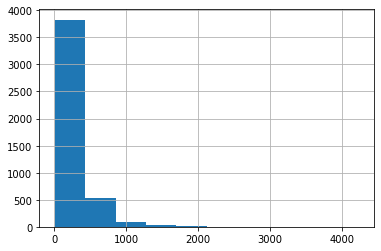

In [66]:
selected_CFAR[selected_CFAR['attached']==1]['fare_price'].hist(bins=10)

<AxesSubplot:>

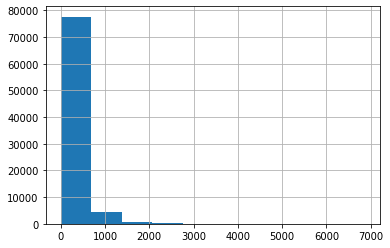

In [68]:
selected_CFAR[selected_CFAR['attached']==0]['fare_price'].hist(bins=10)

#### Distribution is follows same trend in attached and Non-attached CFAR feature.

# Machine Learning Model for predicting User of CFAR User
i.e. classiying attached based on data

In [22]:
import sklearn as sk

## Preparing Data

In [23]:
cfar_data.columns

Index(['booking_date_utc', 'departure_date_utc', 'return_date_utc',
       'airport_origin', 'airport_destination', 'country_origin',
       'country_destination', 'airline', 'fare_price', 'shelf_level',
       'advance', 'num_pax', 'trip_type', 'premium_pct', 'premium_per_pax',
       'attached', 'exercised'],
      dtype='object')

In [24]:
model_data = cfar_data[['airport_origin','airport_destination','country_origin','country_destination','airline', 'fare_price', 'shelf_level','advance', 'num_pax', 'trip_type', 'premium_pct','attached', 'exercised']]
model_data.head(5)

,airport_origin,airport_destination,country_origin,country_destination,airline,fare_price,shelf_level,advance,num_pax,trip_type,premium_pct,attached,exercised
0,DPS,LBJ,ID,ID,QZ,$123.22,1,26,1,r,28.00%,1,0
1,ORY,CTA,FR,IT,TO,$44.66,0,39,1,o,30.00%,0,0
2,MEX,CUN,MX,MX,VB,$67.19,1,0,2,o,20.00%,0,0
3,YHZ,YYZ,CA,CA,WO,$136.57,0,85,2,r,17.00%,0,0
4,JFK,MIA,US,US,B6,$173.20,0,22,1,r,16.00%,1,1


In [25]:
model_data.dtypes

airport_origin         object
airport_destination    object
country_origin         object
country_destination    object
airline                object
fare_price             object
shelf_level             int64
advance                 int64
num_pax                 int64
trip_type              object
premium_pct            object
attached                int64
exercised               int64
dtype: object

In [26]:
model_data.dropna(inplace=True)

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [27]:
sum(model_data['premium_pct'].isnull())

0

In [28]:
model_data['fare_price'] = model_data['fare_price'].apply(lambda x : float(x[1:].replace(',','')))
model_data['premium_pct'] = model_data['premium_pct'].str.strip()
model_data['premium_pct'] = model_data['premium_pct'].apply(lambda x: float(x[:-1]))
model_data

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,airport_origin,airport_destination,country_origin,country_destination,airline,fare_price,shelf_level,advance,num_pax,trip_type,premium_pct,attached,exercised
0,DPS,LBJ,ID,ID,QZ,123.22,1,26,1,r,28.0,1,0
1,ORY,CTA,FR,IT,TO,44.66,0,39,1,o,30.0,0,0
2,MEX,CUN,MX,MX,VB,67.19,1,0,2,o,20.0,0,0
3,YHZ,YYZ,CA,CA,WO,136.57,0,85,2,r,17.0,0,0
4,JFK,MIA,US,US,B6,173.20,0,22,1,r,16.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,GUA,SJO,GT,CR,Y4,249.22,1,25,1,r,19.0,0,0
87495,LAX,GDL,US,MX,Y4,352.95,1,5,1,o,14.0,0,0
87496,MEX,MIA,MX,US,Y4,304.79,0,3,1,o,14.0,0,0
87497,MEX,BOG,MX,CO,Y4,149.71,0,38,2,o,23.0,0,0


In [29]:
model_data.dtypes

airport_origin          object
airport_destination     object
country_origin          object
country_destination     object
airline                 object
fare_price             float64
shelf_level              int64
advance                  int64
num_pax                  int64
trip_type               object
premium_pct            float64
attached                 int64
exercised                int64
dtype: object

In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
fields_to_be_encoded = ['airport_origin','airport_destination','country_origin','country_destination','airline','trip_type']
for f in fields_to_be_encoded:
    model_data[f] = le.fit_transform(model_data[f])
model_data

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,airport_origin,airport_destination,country_origin,country_destination,airline,fare_price,shelf_level,advance,num_pax,trip_type,premium_pct,attached,exercised
0,277,544,58,69,160,123.22,1,26,1,1,28.0,1,0
1,702,238,42,77,184,44.66,0,39,1,0,30.0,0,0
2,609,244,93,107,199,67.19,1,0,2,0,20.0,0,0
3,1006,1080,22,27,216,136.57,0,85,2,1,17.0,0,0
4,481,637,135,152,40,173.20,0,22,1,1,16.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,395,880,50,34,227,249.22,1,25,1,1,19.0,0,0
87495,525,369,135,107,227,352.95,1,5,1,0,14.0,0,0
87496,609,637,93,152,227,304.79,0,3,1,0,14.0,0,0
87497,609,133,93,33,227,149.71,0,38,2,0,23.0,0,0


In [31]:
x = model_data[['airport_origin', 'airport_destination', 'country_origin','country_destination', 'airline', 'fare_price', 'shelf_level','advance', 'num_pax', 'trip_type', 'premium_pct']]
y = model_data['attached']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Selection
#### DecisionTree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier(random_state=42)
clf_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

#### RandomForest Classifier

In [43]:
from sklearn.ensemble  import RandomForestClassifier
clf_random_forest = RandomForestClassifier(random_state=42)
clf_random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#### GradientBoost Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient_boosting = GradientBoostingClassifier(random_state=42)
clf_gradient_boosting.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

## Evaluating Classification

In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def score(y_true,y_pred):
    scores = {}
    scores['f1_score'] = f1_score(y_true,y_pred)
    scores['accuracy_score'] = accuracy_score(y_true,y_pred)
    scores['recall_score'] = recall_score(y_true,y_pred)
    scores['precision_score'] = precision_score(y_true,y_pred)
    return scores

#### Decision Tree classfication score

In [48]:
score(y_test,clf_decision_tree.predict(X_test))

{'f1_score': 0.1123152709359606,
 'accuracy_score': 0.8958200844077008,
 'recall_score': 0.12751677852348994,
 'precision_score': 0.10035211267605634}

#### Random Forest classfication score

In [49]:
score(y_test,clf_random_forest.predict(X_test))

{'f1_score': 0.028415300546448086,
 'accuracy_score': 0.9486038041278835,
 'recall_score': 0.0145413870246085,
 'precision_score': 0.6190476190476191}

#### Gradient Boosting classfication score

In [51]:
score(y_test,clf_gradient_boosting.predict(X_test))

{'f1_score': 0.0,
 'accuracy_score': 0.9481991096721974,
 'recall_score': 0.0,
 'precision_score': 0.0}

# Machine Learning Model for exercising CFAR prediction

In [54]:
model_data_e = model_data[model_data['attached']==1]
x = model_data_e[['airport_origin', 'airport_destination', 'country_origin','country_destination', 'airline', 'fare_price', 'shelf_level','advance', 'num_pax', 'trip_type', 'premium_pct']]
y = model_data_e['exercised']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf_decision_tree = DecisionTreeClassifier(random_state=42)
clf_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
from sklearn.ensemble  import RandomForestClassifier
clf_random_forest = RandomForestClassifier(random_state=4)
clf_random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=4)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,random_state=42)
clf_gradient_boosting.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, random_state=42)

In [60]:
score(y_test,clf_decision_tree.predict(X_test))

{'f1_score': 0.18726591760299624,
 'accuracy_score': 0.7559055118110236,
 'recall_score': 0.1953125,
 'precision_score': 0.17985611510791366}

In [64]:
score(y_test,clf_random_forest.predict(X_test))

{'f1_score': 0.0,
 'accuracy_score': 0.8526434195725534,
 'recall_score': 0.0,
 'precision_score': 0.0}

In [62]:
score(y_test,clf_gradient_boosting.predict(X_test))

{'f1_score': 0.0878048780487805,
 'accuracy_score': 0.7896512935883014,
 'recall_score': 0.0703125,
 'precision_score': 0.11688311688311688}